<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/blackoilvscomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://petrowiki.spe.org/Phase_behavior_in_reservoir_simulation

https://www.tandfonline.com/doi/full/10.1080/10916466.2010.506459

https://onepetro.org/SPEATCE/proceedings/00ATCE/All-00ATCE/SPE-63087-MS/132070


# Black oil vs. Computational Simulation
The reservoir simulation is used because a real reservoir can only be produced once, but a proper model can be produced under different scenarios to optimize the oil recovery (Dandonna et al., 1992). There are two types of simulation methods in the oil industry:

1. 	
Black oil model: In this model, oil is treated as a single component with no interaction with the gas or water phases.

2. 	
Compositional model: In this model the interaction between various hydrocarbon phases should be considered.

# Black-oil PVT models

https://petrowiki.spe.org/Phase_behavior_in_reservoir_simulation

Black-oil PVT properties are generated in one of two ways. For low- to medium-gas-oil-ratio (GOR) oils (< 150 Sm3 /Sm3 ), a traditional differential liberation experiment (DLE) is used, with corrections for separator flash to calculate oil formation volume factor (FVF) Bo and solution GOR Rs, as well as the gas FVF Bg.[13] This approach assumes the reservoir gas contains unsubstantial amounts of condensate in solution, with solution oil/gas ratio rs ~ 0.

The more common and general approach to generating black-oil PVT properties uses an EOS model to simulate a depletion-type PVT experiment (differential liberation, constant volume depletion, or constant composition expansion), with the equilibrium gas and equilibrium oil at each stage in the depletion being individually processed to surface conditions to provide the four black-oil properties[1][17]:

* $B_o$
* $R_s$
* $B_g$
* $r_s$



# Black oil correlations
“Black Oil” type correlations may be used in PVTsim to generate PVT tables for the Eclipse Black Oil reservoir simulator (E 100). Only a minimum set of information is needed, i.e. reservoir temperature, API gravity of the fluid, gas gravity and pressure stages.

In [22]:
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [23]:
fluid1 = createfluid('black oil')
fluid1.setTemperature(15.0, 'C')
fluid1.setPressure(1.0, 'atm')
TPflash(fluid1)
fluid1.initProperties()
print('oil density ', fluid1.getPhase('oil').getDensity('kg/m3'))
print('gas density ', fluid1.getPhase('gas').getDensity('kg/m3'))
print('GOR ', fluid1.getPhase('gas').getVolume('m3')/fluid1.getPhase('oil').getVolume('m3'))

oil density  764.5959871221564
gas density  1.1225518536090537
GOR  49.29021848218331


                         total         gas         oil                  
          nitrogen   1.0846E-2  2.40232E-2  4.73805E-5   [mole fraction]
               CO2   2.1692E-2  4.70946E-2  8.74781E-4   [mole fraction]
           methane  2.38612E-1  5.25479E-1  3.52647E-3   [mole fraction]
            ethane  1.19306E-1    2.523E-1  1.03186E-2   [mole fraction]
           propane  5.42299E-2  1.01151E-1  1.57784E-2   [mole fraction]
          i-butane   1.0846E-2  1.60962E-2  6.54345E-3   [mole fraction]
          n-butane  1.30152E-2  1.67619E-2  9.94475E-3   [mole fraction]
         i-pentane   1.0846E-2  8.15293E-3  1.30529E-2   [mole fraction]
         n-pentane   1.0846E-2  6.61595E-3  1.43125E-2   [mole fraction]
          n-hexane   1.0846E-2  2.31785E-3  1.78347E-2   [mole fraction]
        C10-C15_PC   2.1692E-1  7.23204E-6  3.94678E-1   [mole fraction]
        C16-C19_PC   1.0846E-1  7.70413E-8  1.97342E-1   [mole fraction]
        C20-C30_PC   1.0846E-1  1.51343E-9  1.97342

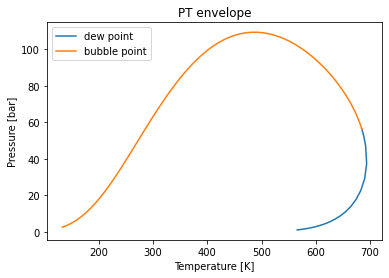

<java object 'neqsim.thermodynamicOperations.ThermodynamicOperations'>

In [24]:

printFrame(fluid1)
phaseenvelope(fluid1, True)

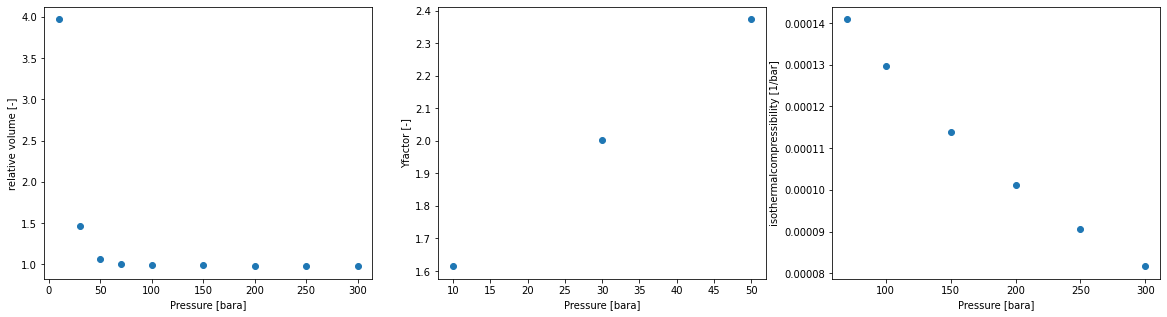

In [25]:
fluid1 = createfluid('black oil')
resTemperature = 60.0
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = [resTemperature]*9

relativevolume = []
liquidrelativevolume = []
Zgas =  []
Yfactor = []
isothermalcompressibility = []
satPressure = None
CME(fluid1,pressure,temperature,satPressure,relativevolume, liquidrelativevolume,Zgas,Yfactor,isothermalcompressibility)

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, relativevolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('relative volume [-]')
plt.subplot(132)
plt.plot(pressure, Yfactor, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Yfactor [-]')
plt.subplot(133)
plt.plot(pressure, isothermalcompressibility, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('isothermalcompressibility [1/bar]')
plt.show()

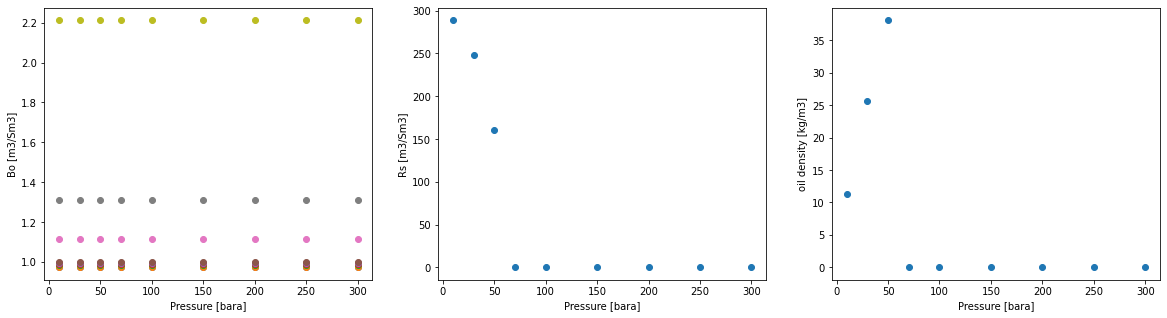

In [27]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = 301.0

Bo = []
Bg = []
relativegravity = []
Zgas =  []
gasstandardvolume = []
Rs = []
oildensity = []
relativegravity = []

difflib(fluid1,pressure,temperature,Bo, Bg,relativegravity,Zgas,gasstandardvolume,Rs, oildensity, relativegravity)


plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, Bo, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo [m3/Sm3]')
plt.subplot(132)
plt.plot(pressure, Rs, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Rs [m3/Sm3]')
plt.subplot(133)
plt.plot(pressure, oildensity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('oil density [kg/m3]')
plt.show()